In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import gc
import traceback

# xsuite
import xtrack as xt
import xmask as xm
import xfields as xf
import xpart as xp
import xobjects as xo


# BBStudies
import sys
sys.path.append('/Users/pbelanger/ABPLocal/BBStudies')
sys.path.append('/home/phbelang/abp/BBStudies')
import BBStudies.Tracking.XsuitePlus as xPlus
import BBStudies.Tracking.Progress as pbar
import BBStudies.Tracking.InteractionPoint as inp
import BBStudies.Physics.Detuning as tune
import BBStudies.Plotting.BBPlots as bbplt
import BBStudies.Physics.Base as phys
import BBStudies.Physics.Constants as cst

# JOB imports
import importlib
sys.path.append('../../')
main_002 = importlib.import_module('Jobs.002_user_specific_tasks.main')
main = importlib.import_module('Jobs.003_particle_dist_and_track.main')





# tracked   = xPlus.Tracking_Interface.from_parquet('zfruits/BUNCH_0224_for_2s' ,partition_name='CHUNK',
#                     start_at_turn = 0,
#                     stop_at_turn  = 2000)
# tracked2   = xPlus.Tracking_Interface.from_parquet('zfruits/BUNCH_0224_for_2s' ,partition_name='CHUNK',
#                     start_at_turn = 20000,
#                     stop_at_turn  = 22000)








tracking_path = 'zfruits/BBB_Signature/FULL/'
tracked   = xPlus.Tracking_Interface.from_parquet(tracking_path ,partition_name='CHUNK')

data_path = 'zfruits/BBB_Signature/DATA/'
data      = xPlus.Tracking_Interface.from_parquet(data_path,partition_name='BUNCH')
_cpt      = xPlus.Tracking_Interface.from_parquet(data_path.replace('DATA','CHECKPOINTS'),partition_name='BUNCH')
data._checkpoint = _cpt._checkpoint


In [2]:
data.checkpoint

,BUNCH,Chunk ID,turn,particle,state,x,px,y,py,zeta,pzeta
0,224,0,0,0,1,0.000256,-2.260354e-06,-0.000254,-5.943542e-06,-0.065732,-0.000168
1,224,0,0,1,1,0.000048,-1.845491e-06,-0.000120,-5.751055e-06,-0.118765,-0.000005
2,224,0,0,2,1,0.000205,-3.536120e-06,-0.000067,-1.825759e-06,0.000629,0.000037
3,224,0,0,3,1,0.000444,-4.909890e-06,0.000086,1.767300e-06,0.021972,0.000034
4,224,0,0,4,1,0.000379,-4.032402e-06,0.000157,3.740551e-06,-0.086765,0.000061
...,...,...,...,...,...,...,...,...,...,...,...
4995,224,4,4000,995,1,0.000079,-9.415879e-07,-0.000254,-1.813997e-06,-0.159415,-0.000030
4996,224,4,4000,996,1,0.000353,-2.881752e-06,0.000255,3.006578e-06,-0.076078,-0.000110
4997,224,4,4000,997,1,-0.000037,2.543910e-06,-0.000196,-5.402008e-06,-0.007522,-0.000075
4998,224,4,4000,998,1,0.000236,-3.192804e-06,-0.000266,-1.971261e-06,0.081462,0.000016


In [2]:
tracked.df.groupby('turn').count()

,CHUNK,particle,x,px,y,py,zeta,pzeta,state,at_element
turn,,,,,,,,,,
0,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
1,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
2,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
3,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
4,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
...,...,...,...,...,...,...,...,...,...,...
4995,1,1,1,1,1,1,1,1,1,1
4996,1,1,1,1,1,1,1,1,1,1
4997,1,1,1,1,1,1,1,1,1,1


In [4]:
data.coord

,particle,state,x,px,y,py,zeta,pzeta
0,0,1,0.000256,-2.259797e-06,-0.000254,-5.944226e-06,-0.065732,-0.000168
1,1,1,0.000048,-1.846248e-06,-0.000121,-5.749920e-06,-0.118765,-0.000005
2,2,1,0.000205,-3.536387e-06,-0.000067,-1.824989e-06,0.000629,0.000037
3,3,1,0.000444,-4.909583e-06,0.000086,1.768352e-06,0.021972,0.000034
4,4,1,0.000379,-4.032438e-06,0.000157,3.741955e-06,-0.086765,0.000061
...,...,...,...,...,...,...,...,...
995,995,1,-0.000110,6.127417e-07,-0.000063,-3.918420e-06,0.145237,-0.000077
996,996,1,-0.000423,4.509167e-06,0.000204,5.502552e-06,-0.068070,-0.000117
997,997,1,0.000017,-2.455111e-06,-0.000140,8.685942e-07,-0.047792,0.000051
998,998,1,-0.000024,-5.665137e-07,0.000101,-1.239340e-06,0.014736,-0.000098


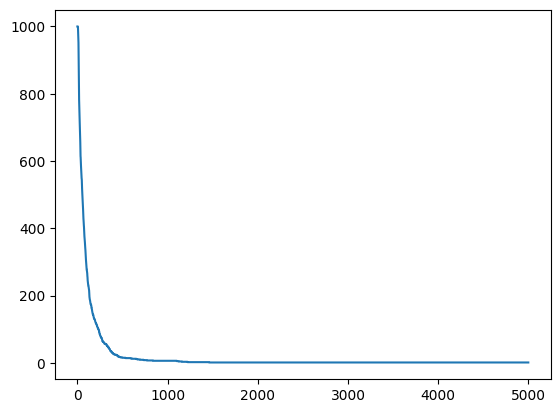

In [3]:
plt.figure()
plt.plot(tracked.df.groupby('turn').count().particle)



In [4]:
tracked.df


,CHUNK,turn,particle,x,px,y,py,zeta,pzeta,state,at_element
0,0,0,0,0.000256,-2.260354e-06,-0.000254,-5.943542e-06,-0.065732,-0.000168,1,36806
1,0,1,0,0.000479,-1.657944e-06,0.000265,4.446475e-06,-0.064774,-0.000168,1,0
2,0,2,0,0.000308,-8.926772e-06,-0.000028,-3.913728e-06,-0.063195,-0.000169,1,0
3,0,3,0,-0.000913,1.118046e-05,-0.000259,-1.764847e-06,-0.061602,-0.000170,1,0
4,0,4,0,0.000067,4.859338e-06,0.000201,5.194607e-06,-0.059998,-0.000171,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4999995,4,4995,999,0.000165,-3.303931e-08,-0.000103,-1.010455e-06,-0.078032,0.000042,1,0
4999996,4,4996,999,0.000259,-5.012653e-06,0.000075,2.105125e-06,-0.078403,0.000041,1,0
4999997,4,4997,999,-0.000298,2.784728e-06,0.000060,-4.230407e-07,-0.078762,0.000040,1,0
4999998,4,4998,999,-0.000015,2.478522e-06,-0.000109,-1.535494e-06,-0.079108,0.000039,1,0


In [6]:
tracked.df


,CHUNK,turn,particle,x,px,y,py,zeta,pzeta,state,at_element
0,0,0,0,0.000256,-0.000002,-0.000254,-0.000006,-0.065732,-0.000168,1,36806
1,0,1,0,0.000479,-0.000002,0.000265,0.000004,-0.064774,-0.000168,1,0
2,0,2,0,0.000308,-0.000009,-0.000028,-0.000004,-0.063195,-0.000169,1,0
3,0,3,0,-0.000913,0.000011,-0.000259,-0.000002,-0.061602,-0.000170,1,0
4,0,4,0,0.000067,0.000005,0.000201,0.000005,-0.059998,-0.000171,1,0
...,...,...,...,...,...,...,...,...,...,...,...
5201616,5,2995,998,-0.001263,0.000022,-0.000351,-0.000007,-0.008437,0.000207,1,0
5201617,5,2996,998,0.001285,-0.000010,-0.000039,0.000005,-0.010348,0.000207,1,0
5201618,5,2997,998,0.000209,-0.000012,0.000395,0.000004,-0.012264,0.000207,1,0
5201619,5,2998,998,-0.001278,0.000019,-0.000289,-0.000007,-0.014170,0.000207,1,0


---
# Collimator half-opening 
---

In [28]:
sig_x = []
sig_y = []
for bunch_ID in [p.name.split('=')[1] for p in list(Path(data_path).rglob('BUNCH*/'))]:
    _data = xPlus.Tracking_Interface.from_parquet(data_path,partition_name='BUNCH',partition_ID=bunch_ID)
    sig_x.append(_data.sig_x)
    sig_y.append(_data.sig_y)



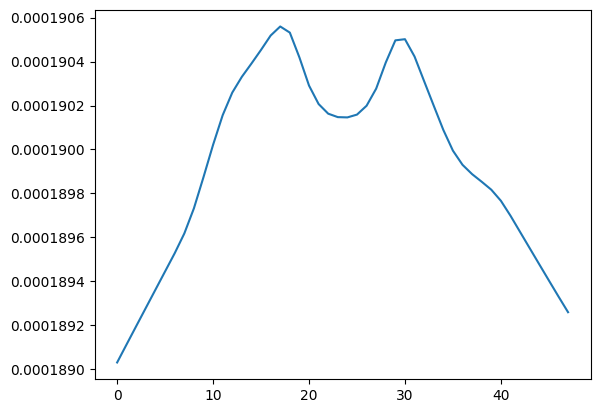

In [48]:
plt.figure()
plt.plot(sig_x)

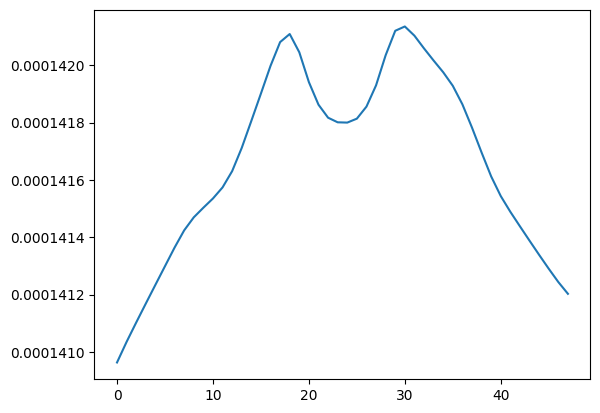

In [49]:
plt.figure()
plt.plot(sig_y)

In [122]:
coll_opening = 5
coll_x = 100*np.mean(sig_x/np.sqrt(_data.nemitt_x)*np.sqrt(3.5e-6))
coll_y = 100*np.mean(sig_y/np.sqrt(_data.nemitt_y)*np.sqrt(3.5e-6))
coll_s = 1e-3#100*np.mean([coll_x,coll_y])

In [51]:
coll_opening = 5
coll_x = 2.602e-3/2
coll_y = 1.86e-3/2
coll_s = 2.189e-3/2

---
# Computing Intensity
---

In [5]:


def lost_condition(x_min,y_min,skew_min,x_max,y_max,skew_max):
    # y_fun_skew = lambda _x: np.tan(np.deg2rad(skew_angle))*_x + coll_s/np.cos(np.deg2rad(180-skew_angle))
    # np.abs(y)>y_fun_skew(np.abs(x)))
    return (np.abs(x_min)>coll_x)|(np.abs(y_min)>coll_y)|(np.abs(x_max)>coll_x)|(np.abs(y_max)>coll_y) |(np.abs(skew_max)>coll_s) |(np.abs(skew_min)>coll_s)

Intensity = {}
survived  = {}
for name,group in data.data.groupby('BUNCH'):


    _lost  = lost_condition(group.x_min,group.y_min,group.skew_min,group.x_max,group.y_max,group.skew_max)
    idx_lost     = group.index[_lost]
    idx_survived = group.index[~_lost]


    # New columns
    try:
        group.insert(0,'beyond_coll',False)
        group.insert(0,'lost',False)
    except:
        group.loc[:,'beyond_coll'] = False
        group.loc[:,'lost'] = False



    group.loc[idx_lost,'beyond_coll'] = True
    group.loc[:,'lost'] = group.groupby('particle').beyond_coll.cumsum().astype(bool)

    Intensity[name] = group[~group.lost].groupby('start_at_turn').count().lost
    survived[name]  = group[~group.lost].groupby('start_at_turn').get_group(group.start_at_turn.max()).particle


/var/folders/yf/hpn77ycx7h50r6rt81q7lghr0000gn/T/ipykernel_99126/2801154463.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for name,group in data.data.groupby('BUNCH'):


AttributeError: 'DataFrame' object has no attribute 'x_min'

In [6]:
data.data

,BUNCH,Chunk ID,particle,state,start_at_turn,stop_at_turn,skew_min,skew_max,Qx,Qy,Qzeta
0,224,0,0,0,0,1000,0.007648,-0.008607,0.233375,0.422875,4.951768e-10
1,224,0,1,0,0,1000,0.009519,-0.007520,0.278800,0.362328,9.766907e-04
2,224,0,2,0,0,1000,0.008643,-0.023605,0.249000,0.404273,4.900266e-10
3,224,0,3,0,0,1000,0.011472,-0.006770,0.280250,0.376000,1.271875e-02
4,224,0,4,0,0,1000,0.013817,-0.007147,0.269508,0.399391,4.948919e-10
...,...,...,...,...,...,...,...,...,...,...,...
4995,224,4,995,0,1416,2416,0.000000,0.000000,NaN,NaN,NaN
4996,224,4,996,0,1416,2416,0.000000,0.000000,NaN,NaN,NaN
4997,224,4,997,0,1416,2416,0.000000,0.000000,NaN,NaN,NaN
4998,224,4,998,0,1416,2416,0.000000,0.000000,NaN,NaN,NaN


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


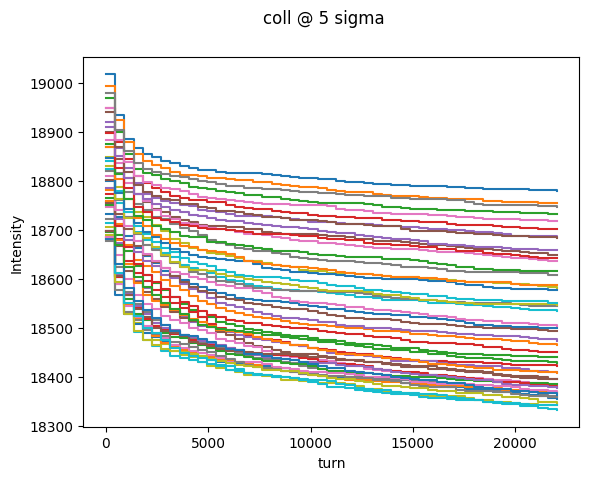

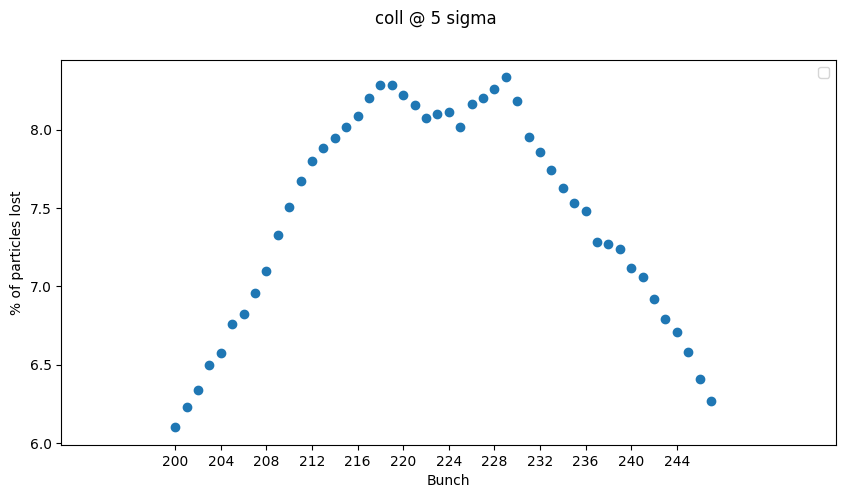

In [53]:

# Plotting Intensity
plt.figure()
plt.suptitle(f'coll @ {coll_opening:0.0f} sigma')
for key,_intensity in Intensity.items():
    plt.step(_intensity.index,_intensity.values,where='post',label=f'Bunch {key}')
plt.xlabel('turn')
plt.ylabel('Intensity')
# plt.legend()

# Plotting Intensity
plt.figure(figsize=(10,5))
plt.suptitle(f'coll @ {coll_opening:0.0f} sigma')
for key,_intensity in Intensity.items():
    # plt.step(_intensity.index,_intensity.values,where='post',label=f'Bunch {key}')
    plt.plot([key],[100*np.abs(20000-np.min(_intensity.values))/20000],'o',color='C0')
plt.xlabel('Bunch')
plt.ylabel('% of particles lost')
plt.xticks(list(Intensity.keys())[::4])
plt.xlim(200-10,248+10)
plt.legend()







---
# Survival plot
---

In [22]:
tracked.df[tracked.df.state !=0].groupby('turn').count()



,CHUNK,particle,x,px,y,py,zeta,pzeta,state,at_element
turn,,,,,,,,,,
0,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
1,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
2,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
3,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
4,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
...,...,...,...,...,...,...,...,...,...,...
2995,410,410,410,410,410,410,410,410,410,410
2996,410,410,410,410,410,410,410,410,410,410
2997,410,410,410,410,410,410,410,410,410,410


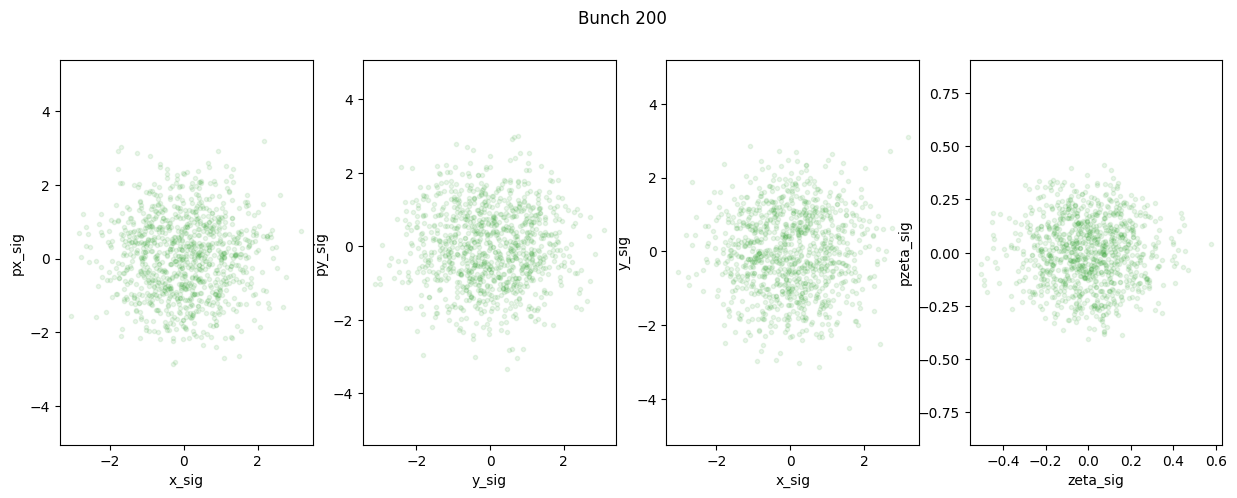

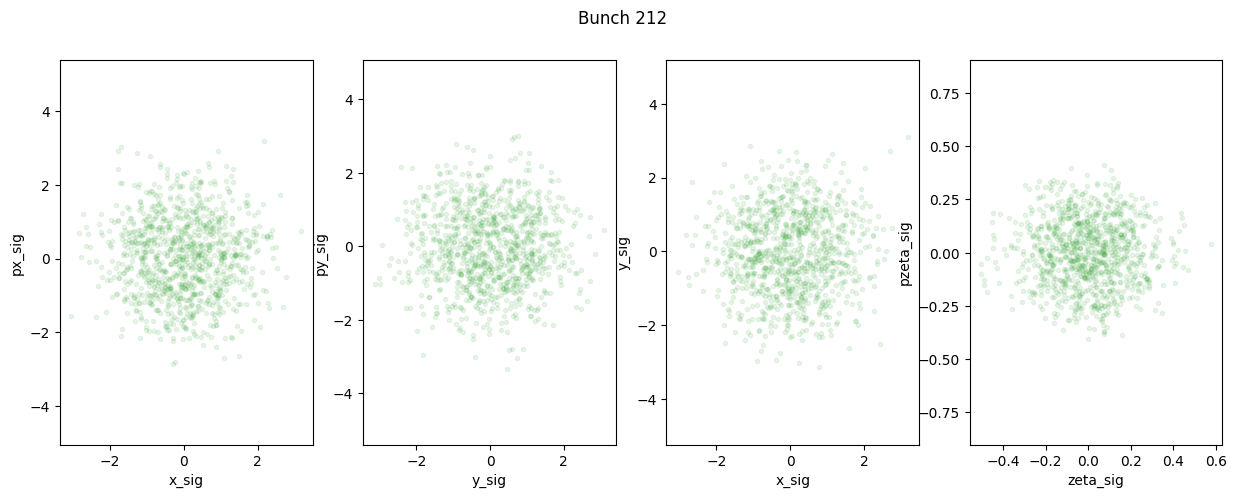

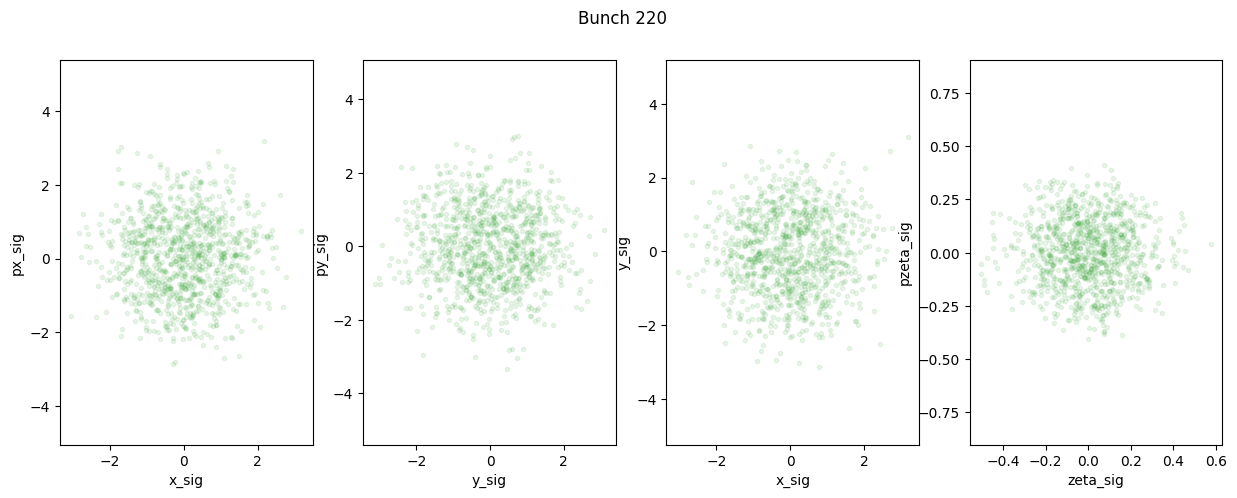

In [5]:
coord = tracked.coord_sig.set_index('particle')

for bunch in [200,212,220]:
    # 3 subplots
    fig,ax = plt.subplots(1,4,figsize=(15,5))
    fig.suptitle(f'Bunch {bunch}')
    for _ax,xy in zip(ax,[('x_sig','px_sig'),('y_sig','py_sig'),('x_sig','y_sig'),('zeta_sig','pzeta_sig')]):
        plt.sca(_ax)
        #group = data.data.groupby('BUNCH').get_group(bunch)
        _x,_y = xy

        plt.plot(coord.loc[:,_x],coord.loc[:,_y],'.',color='C2',alpha=0.1,label = 'survived')
        plt.xlabel(_x)
        plt.ylabel(_y)
        plt.axis('equal')

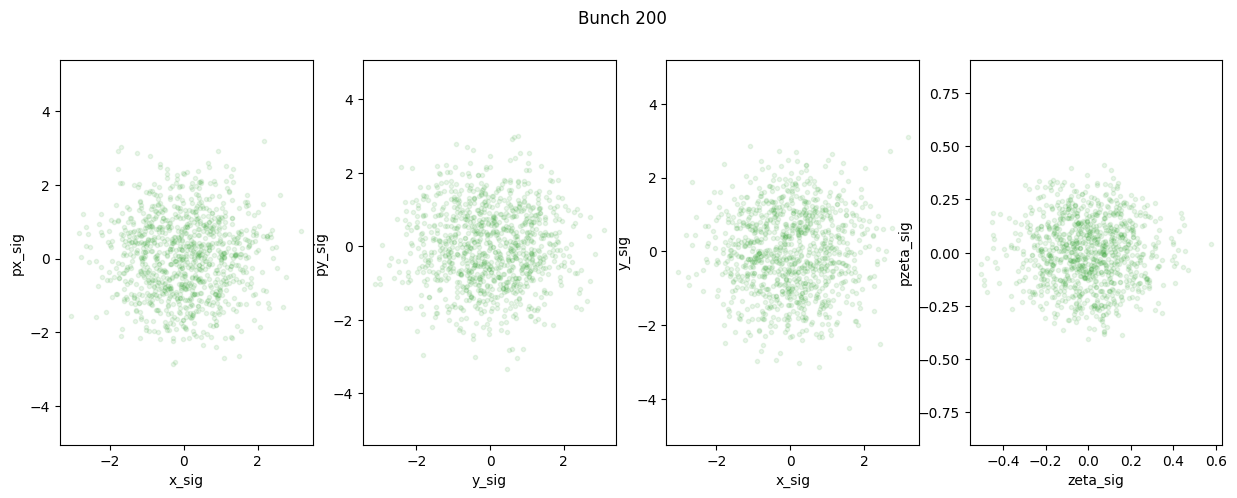

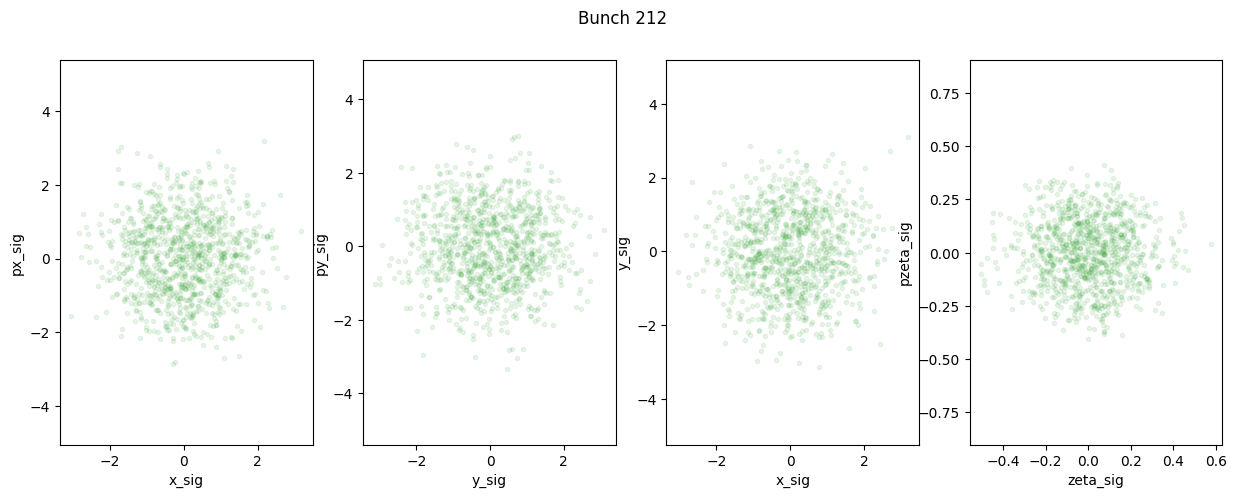

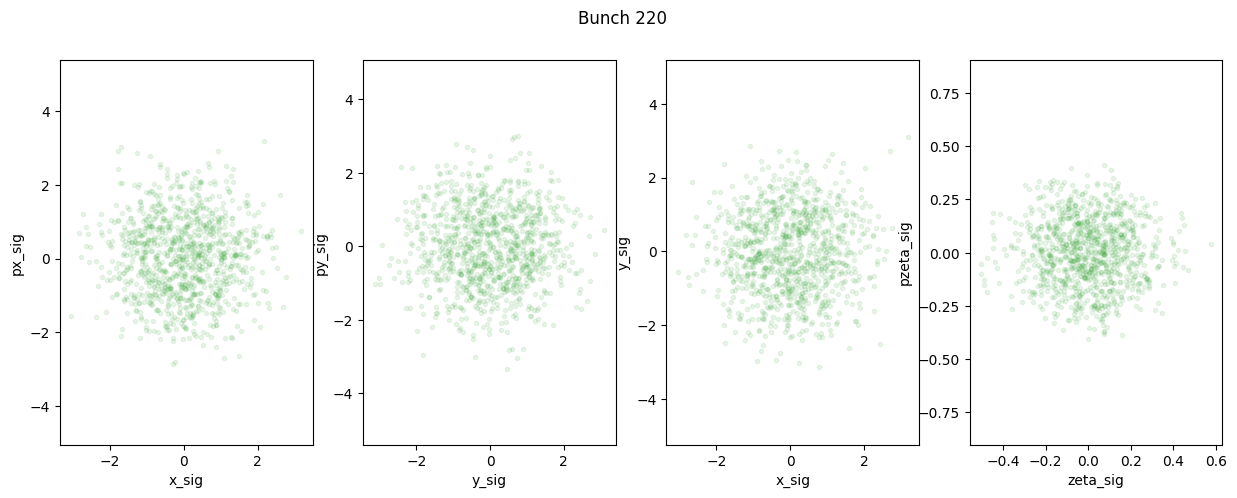

In [5]:
coord = tracked.coord_sig.set_index('particle')

for bunch in [200,212,220]:
    # 3 subplots
    fig,ax = plt.subplots(1,4,figsize=(15,5))
    fig.suptitle(f'Bunch {bunch}')
    for _ax,xy in zip(ax,[('x_sig','px_sig'),('y_sig','py_sig'),('x_sig','y_sig'),('zeta_sig','pzeta_sig')]):
        plt.sca(_ax)
        #group = data.data.groupby('BUNCH').get_group(bunch)
        _x,_y = xy

        plt.plot(coord.loc[:,_x],coord.loc[:,_y],'.',color='C2',alpha=0.1,label = 'survived')
        plt.xlabel(_x)
        plt.ylabel(_y)
        plt.axis('equal')

In [4]:
tracked.df.groupby('turn').count()

,CHUNK,particle,x,px,y,py,zeta,pzeta,state,at_element
turn,,,,,,,,,,
0,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
1,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
2,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
3,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
4,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
...,...,...,...,...,...,...,...,...,...,...
4995,1,1,1,1,1,1,1,1,1,1
4996,1,1,1,1,1,1,1,1,1,1
4997,1,1,1,1,1,1,1,1,1,1


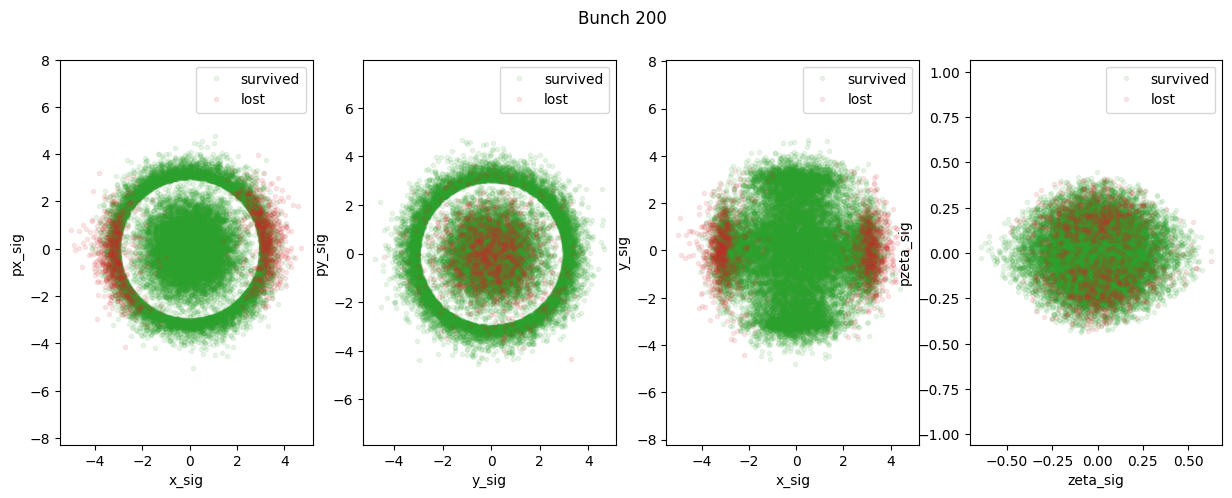

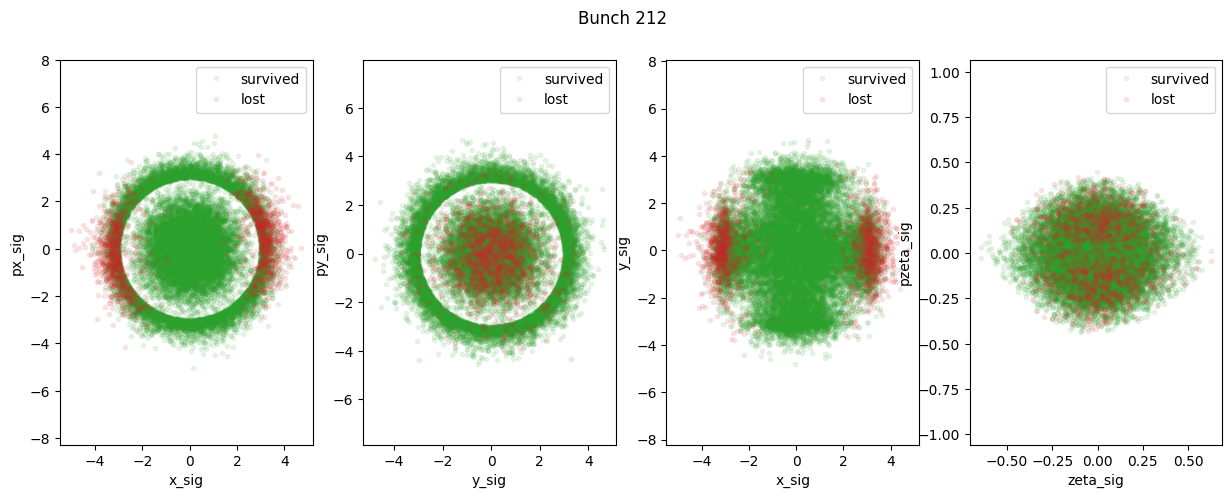

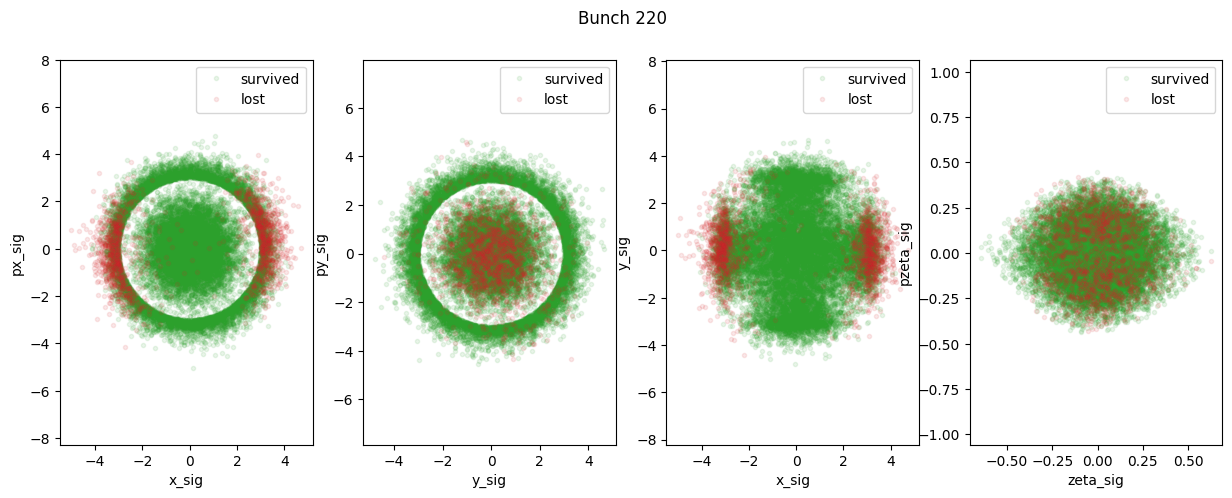

In [45]:
coord = tracked.coord_sig.set_index('particle')

for bunch in [200,212,220]:
    # 3 subplots
    fig,ax = plt.subplots(1,4,figsize=(15,5))
    fig.suptitle(f'Bunch {bunch}')
    for _ax,xy in zip(ax,[('x_sig','px_sig'),('y_sig','py_sig'),('x_sig','y_sig'),('zeta_sig','pzeta_sig')]):
        plt.sca(_ax)
        #group = data.data.groupby('BUNCH').get_group(bunch)
        _x,_y = xy
        _surv = survived[bunch]
        plt.plot(coord.loc[coord.index.isin(_surv),_x],coord.loc[coord.index.isin(_surv),_y],'.',color='C2',alpha=0.1,label = 'survived')
        plt.plot(coord.loc[~coord.index.isin(_surv),_x],coord.loc[~coord.index.isin(_surv),_y],'.',color='C3',alpha=0.1,label = 'lost')
        plt.legend()
        plt.xlabel(_x)
        plt.ylabel(_y)
        plt.axis('equal')

In [50]:
tracked.df

,CHUNK,turn,particle,x,px,y,py,zeta,pzeta,state,at_element
0,0,0,0,-0.000165,1.504553e-06,-0.000419,-0.000008,-0.009383,-0.000011,1,36806
1,0,1,0,-0.000145,2.433427e-07,0.000369,0.000004,-0.009313,-0.000011,1,0
2,0,2,0,-0.000172,3.659527e-06,-0.000205,-0.000007,-0.009203,-0.000011,1,0
3,0,3,0,0.000253,-2.632188e-06,-0.000207,0.000001,-0.009092,-0.000011,1,0
4,0,4,0,-0.000009,-1.756062e-06,0.000375,0.000006,-0.008980,-0.000011,1,0
...,...,...,...,...,...,...,...,...,...,...,...
219995,0,6,19999,-0.000099,1.343115e-06,0.000292,0.000009,0.122525,-0.000157,1,0
219996,0,7,19999,-0.000021,6.839483e-07,0.000265,-0.000002,0.123983,-0.000155,1,0
219997,0,8,19999,-0.000003,-1.942606e-07,-0.000510,-0.000008,0.125428,-0.000154,1,0
219998,0,9,19999,-0.000093,1.137702e-06,0.000140,0.000008,0.126858,-0.000152,1,0


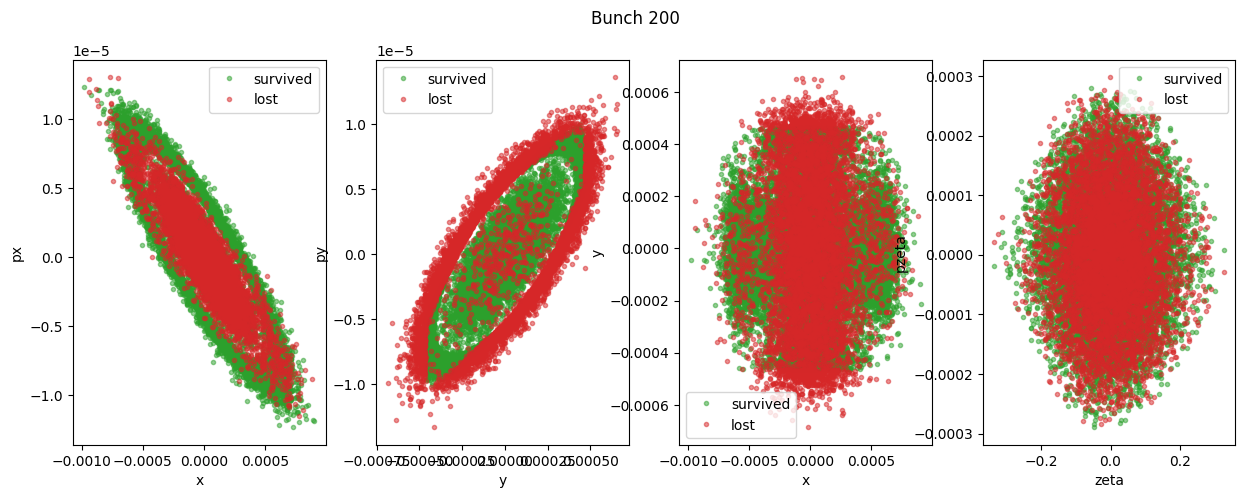

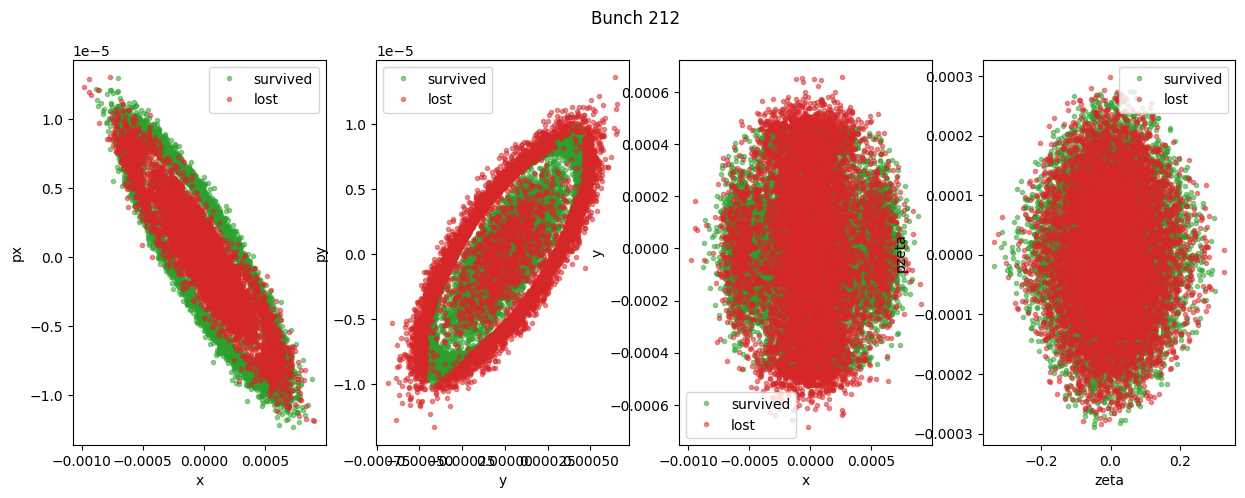

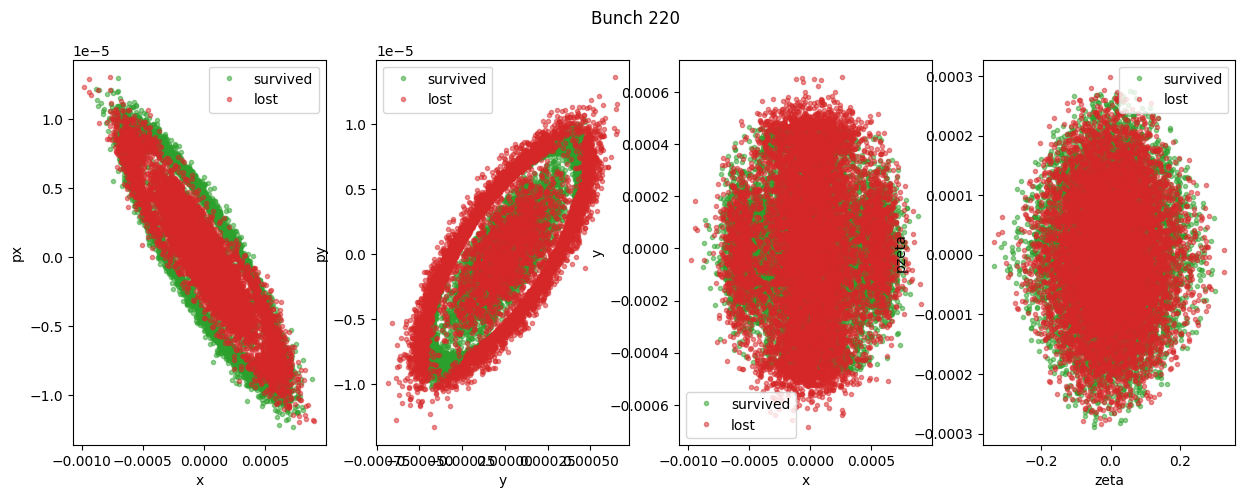

In [35]:
coord = tracked.coord.set_index('particle')

for bunch in [200,212,220]:
    # 3 subplots
    fig,ax = plt.subplots(1,4,figsize=(15,5))
    fig.suptitle(f'Bunch {bunch}')
    for _ax,xy in zip(ax,[('x','px'),('y','py'),('x','y'),('zeta','pzeta')]):
        plt.sca(_ax)
        #group = data.data.groupby('BUNCH').get_group(bunch)
        _x,_y = xy
        _surv = survived[bunch]
        plt.plot(coord.loc[coord.index.isin(_surv),_x],coord.loc[coord.index.isin(_surv),_y],'.',color='C2',alpha=0.5,label = 'survived')
        plt.plot(coord.loc[~coord.index.isin(_surv),_x],coord.loc[~coord.index.isin(_surv),_y],'.',color='C3',alpha=0.5,label = 'lost')
        plt.legend()
        plt.xlabel(_x)
        plt.ylabel(_y)
        # plt.axis('equal')

In [33]:
tracked.coord_sig

,particle,x_sig,px_sig,y_sig,py_sig,zeta_sig,pzeta_sig
0,0,-0.907065,-0.581436,-2.925955,-1.234048,-0.017906,-0.017513
11,1,1.909728,-0.306638,2.920092,2.157437,-0.267172,-0.068084
22,2,0.944548,3.098158,0.354012,-1.135043,-0.167594,-0.272978
33,3,0.681791,1.488331,0.459694,-3.160690,-0.015687,0.321973
44,4,-2.658891,1.642667,-1.219135,-1.907869,0.100259,0.178585
...,...,...,...,...,...,...,...
219945,19995,0.784589,-0.237477,0.455016,-3.161303,0.075189,0.182005
219956,19996,1.201182,-1.494828,-1.469346,2.641955,-0.028226,-0.083205
219967,19997,3.427679,1.906518,0.656714,0.803733,0.112736,0.091993
219978,19998,1.061793,0.299570,2.630193,1.582029,0.423919,0.218893


In [ ]:

# for (name,df),(name2,calc) in zip(tracked.df.groupby('particle'),calculations.calculations.groupby('particle')):
    # assert name==name2, "Problem with the particle ID"
    # if name in [10,20,30]:

worst_particles = calculations.data.groupby('particle').apply(lambda part: np.max(part.x_max)-np.min(part.x_max)).sort_values(ascending=False).index
# for part_ID in worst_particles[1:20]:#np.arange(10,20):
for part_ID in np.arange(10,20):
    df = tracked.df_sig.groupby('particle').get_group(part_ID)
    calc = calculations.calculations_sig.groupby('particle').get_group(part_ID)

    plt.figure()
    plt.plot(df.turn,df.x_sig,'-')
    plt.step(list(calc.start_at_turn) + [list(calc.stop_at_turn)[-1]],list(calc.x_sig_min) + [np.nan],'-',where='post')
    plt.step(list(calc.start_at_turn) + [list(calc.stop_at_turn)[-1]],list(calc.x_sig_max) + [np.nan],'-',where='post',color='C1')
    # plt.axhline(0.005,color='k')
    # plt.axhline(-0.005,color='k')
    # else:
    #     continue
    # plt.ylim([-0.007,0.007])

In [ ]:

# for (name,df),(name2,calc) in zip(tracked.df.groupby('particle'),calculations.calculations.groupby('particle')):
    # assert name==name2, "Problem with the particle ID"
    # if name in [10,20,30]:

worst_particles = calculations.data.groupby('particle').apply(lambda part: np.max(part.x_max)-np.min(part.x_max)).sort_values(ascending=False).index
for part_ID in worst_particles[1:20]:#np.arange(10,20):
    df = tracked.df.groupby('particle').get_group(part_ID)
    calc = calculations.data.groupby('particle').get_group(part_ID)

    plt.figure()
    plt.plot(df.turn,df.x,'-')
    plt.step(list(calc.start_at_turn) + [list(calc.stop_at_turn)[-1]],list(calc.x_min) + [np.nan],'-',where='post')
    plt.step(list(calc.start_at_turn) + [list(calc.stop_at_turn)[-1]],list(calc.x_max) + [np.nan],'-',where='post',color='C1')
    plt.axhline(0.005,color='k')
    plt.axhline(-0.005,color='k')
    # else:
    #     continue
    plt.ylim([-0.007,0.007])

In [ ]:

# for (name,df),(name2,calc) in zip(tracked.df.groupby('particle'),calculations.calculations.groupby('particle')):
    # assert name==name2, "Problem with the particle ID"
    # if name in [10,20,30]:

# worst_particles = calculations.calculations.groupby('particle').apply(lambda part: np.max(part.x_max)-np.min(part.x_max)).sort_values(ascending=True).index
for part_ID in np.arange(10,20):
    df = tracked.df.groupby('particle').get_group(part_ID)
    calc = calculations.data.groupby('particle').get_group(part_ID)

    plt.figure()
    plt.plot(df.turn,df.x,'-')
    plt.step(list(calc.start_at_turn) + [list(calc.stop_at_turn)[-1]],list(calc.x_min) + [np.nan],'-',where='post')
    plt.step(list(calc.start_at_turn) + [list(calc.stop_at_turn)[-1]],list(calc.x_max) + [np.nan],'-',where='post',color='C1')
    plt.axhline(0.005,color='k')
    plt.axhline(-0.005,color='k')
    # else:
    #     continue
    plt.ylim([-0.007,0.007])

In [ ]:
cst.LHC_F_REV*30*60

In [ ]:
calculations.data

In [ ]:
tracked.df

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(tracked.coord_sig.x_sig,tracked.coord_sig.px_sig,'.',alpha=0.1)
plt.axis('square')

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(tracked.coord_sig.x_sig,tracked.coord_sig.y_sig,'.',alpha=0.1)
plt.axis('square')

In [ ]:
calculations

In [ ]:

# for (name,df),(name2,calc) in zip(tracked.df.groupby('particle'),calculations.calculations.groupby('particle')):
    # assert name==name2, "Problem with the particle ID"
    # if name in [10,20,30]:

# worst_particles = calculations.calculations.groupby('particle').apply(lambda part: np.max(part.x_max)-np.min(part.x_max)).sort_values(ascending=True).index
for part_ID in np.arange(10,20):
    df = tracked.df_n.groupby('particle').get_group(part_ID)
    calc = calculations.calculations.groupby('particle').get_group(part_ID)

    plt.figure()
    plt.plot(df.x_n,df.px_n,'-')
    # plt.step(list(calc.start_at_turn) + [list(calc.stop_at_turn)[-1]],list(calc.x_min) + [np.nan],'-',where='post')
    # plt.step(list(calc.start_at_turn) + [list(calc.stop_at_turn)[-1]],list(calc.x_max) + [np.nan],'-',where='post',color='C1')
    # plt.axhline(0.005,color='k')
    # plt.axhline(-0.005,color='k')
    # else:
    #     continue
    # plt.ylim([-0.007,0.007])
    plt.axis('equal')

In [ ]:
tracked.df[tracked.df['turn']>=901]

In [ ]:
import matplotlib.pyplot as plt
test = calculations._calculations
for part in [0,10,20]:
    plt.figure()
    plt.plot(tracked.df.groupby('particle').get_group(part).turn,tracked.df.groupby('particle').get_group(part).x,'-')
    plt.axhline(test.groupby('start_at_turn').get_group(901).iloc[part].x_min,color='k')
    plt.axhline(test.groupby('start_at_turn').get_group(901).iloc[part].x_max,color='k')
    plt.xlim(900,1000)